In [1]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../flaming-choripan') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

In [2]:
from flamingchoripan.files import search_for_filedirs
from synthsne import C_

rootdir = '../../surveys-save'
filedirs = search_for_filedirs(rootdir, fext=C_.EXT_SPLIT_LIGHTCURVE)

────────────────────────────────────────────────────────────────────────────────────────────────────
found filedirs: (../../surveys-save)
(0) - ../../surveys-save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_method-mcmc.splcds - 57.922[mbs]
(1) - ../../surveys-save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_method-linear.splcds - 125.863[mbs]
(2) - ../../surveys-save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_method-bspline.splcds - 125.363[mbs]
(3) - ../../surveys-save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_method-curvefit.splcds - 133.656[mbs]
(4) - ../../surveys-save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_method-uniformprior.splcds - 138.538[mbs]
(5) - ../../surveys-save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe.splcds - 7.056[mbs]
────────────────────────────────────────────────────────────────────────────────────────────────────
filedirs after searching with filters: (../../surveys-save)
(0)

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.files import load_pickle, save_pickle
from flamingchoripan.files import get_dict_from_filedir
from lchandler import C_

def load_lcdataset(filename):
    assert filename.split('.')[-1]==C_.EXT_SPLIT_LIGHTCURVE
    return load_pickle(filename)

method = 'mcmc'
filedir = f'../../surveys-save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_method-{method}.splcds'

filedic = get_dict_from_filedir(filedir)
root_folder = filedic['*rootdir*']
cfilename = filedic['*cfilename*']
survey = filedic['survey']
lcdataset = load_lcdataset(filedir)
print(lcdataset['raw'].keys())
print(lcdataset['raw'].get_random_lcobj(False).keys())
print(lcdataset)

> loading: ../../surveys-save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_method-mcmc.splcds
dict_keys(['data', 'survey', 'description', 'band_names', 'class_names', 'obs_is_flux'])
dict_keys(['days', 'obs', 'obse', 'y', 'synthetic'])
LCDataset:
[outliers - samples 14]
(*) obs_samples: 714 - min_len: 10 - max_dur: 412.9[days] - dur(p50): 128.8[days] - cadence(p50): 0.9[days]
(g) obs_samples: 344 - min_len: 3 - max_dur: 408.0[days] - dur(p50): 127.8[days] - cadence(p50): 2.9[days]
(r) obs_samples: 370 - min_len: 6 - max_dur: 376.0[days] - dur(p50): 100.3[days] - cadence(p50): 3.0[days]
   |█▏      | SLSN - 2/14 (14.29%)
   |        | SNIa - 0/14 (0.00%)
   |██▊     | SNIbc - 5/14 (35.71%)
   |████    | allSNII - 7/14 (50.00%)
────────────────────────────────────────────────────────────────────────────────────────────────────
[raw - samples 2,033]
(*) obs_samples: 64,460 - min_len: 6 - max_dur: 538.8[days] - dur(p50): 52.9[days] - cadence(p50): 1.0[days]
(g) obs_samples: 28,

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


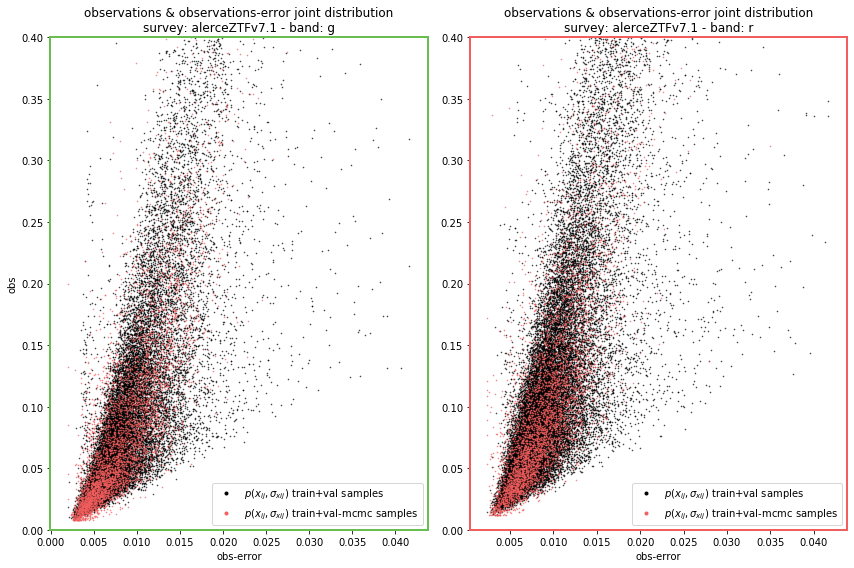

In [6]:
%load_ext autoreload
%autoreload 2
from lchandler.plots.scatters import plot_obs_obse_scatter # to lchandler?

#plot_obs_obse_scatter(lcdataset, 'train', 'train_curvefit', n=2000)
plot_ndict = {
    f'train+val':None,
    f'train+val.{method}':5e3,
}
plot_obs_obse_scatter(lcdataset, list(plot_ndict.keys()), plot_ndict=plot_ndict)
#plot_values_distribution(lcdataset, 'train', 'obs')
#plot_values_distribution(lcdataset, 'train_curvefit', 'obs')